In [19]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
%matplotlib inline
warnings.simplefilter("ignore")

In [106]:
#reading the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [21]:
#checking the top columns 
train.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [11]:
#information about the data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           692 non-null    int64  
 1   GrocerySales  692 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.9 KB


In [22]:
#descriptive statistics

train.describe()

,Day,GrocerySales
count,692.000000,692.000000
mean,346.500000,8564.733471
std,199.907479,428.815668
min,1.000000,6766.370000
25%,173.750000,8411.536858
50%,346.500000,8677.770000
75%,519.250000,8852.387500
max,692.000000,9290.020000


<AxesSubplot:>

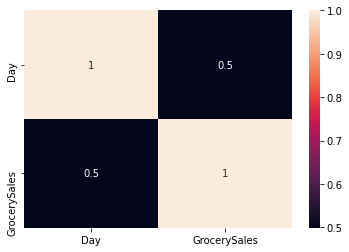

In [23]:
#checking the correlation 

sns.heatmap(train.corr(),annot=True)

### pre-processing and cleaning the data

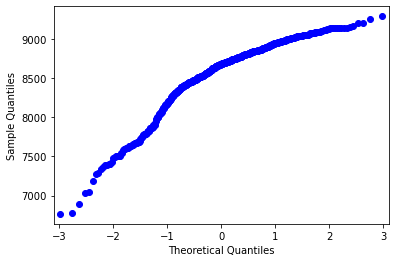

In [31]:
import statsmodels.api as sm
sm.qqplot(train.GrocerySales.values);

<AxesSubplot:xlabel='Day', ylabel='GrocerySales'>

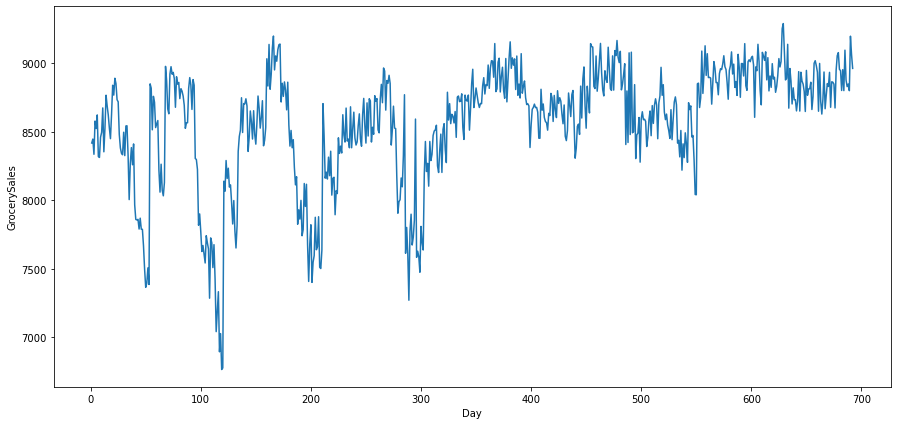

In [37]:
fig = plt.figure(figsize=(15,7))
sns.lineplot(x = train.Day, y=train.GrocerySales)

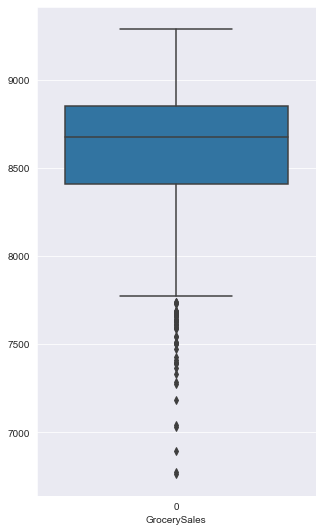

In [76]:
#checking on outliers
plt.figure(figsize=(5,9))
plt.xlabel('GrocerySales')
sns.boxplot(data = train.GrocerySales)
plt.show()

In [53]:
'''
###another way to plot boxplat using pd.melt

#checking on outliers
plt.figure(figsize=(5,5))
sns.boxplot(x= 'variable', y = 'value', data = pd.melt(train[['GrocerySales']]))
'''

"\n###another way to plot boxplat using pd.melt\n\n#checking on outliers\nplt.figure(figsize=(5,5))\nsns.boxplot(x= 'variable', y = 'value', data = pd.melt(train[['GrocerySales']]))\n"

<AxesSubplot:xlabel='GrocerySales', ylabel='Density'>

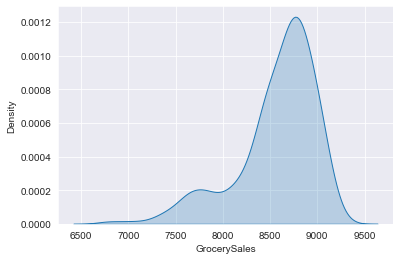

In [67]:
#Grocery Sales density plot 
sns.set_style("darkgrid")
sns.kdeplot(data=train['GrocerySales'],label="GrocerySales" ,shade=True)

[array([8489.5325, 7956.01  ]), array([8852.3875, 9290.02  ])]


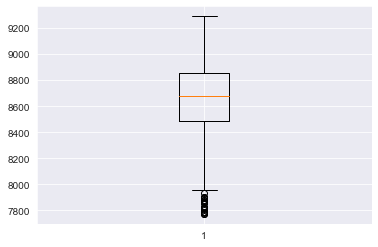

In [128]:
A = plt.boxplot(train.GrocerySales)

print([item.get_ydata() for item in A['whiskers']])


In [113]:
#OUTLIER VALUES
#lower whisker limit is 7773.4
(train[(train['GrocerySales']<7773.4)]).shape

(50, 2)

50 values are outliers which are less than lower whisker limit

In [108]:
print(train.skew())


Day             0.000000
GrocerySales   -1.292026
dtype: float64


In [119]:
median = train['GrocerySales'].median()
print(median)

8677.77


In [123]:
## replacing outliers with median 
train2 = train
train2["GrocerySales"] = np.where(train2["GrocerySales"]< 7773.4, median,train2['GrocerySales'])

In [124]:
train2.skew()

Day             0.000000
GrocerySales   -0.821424
dtype: float64

skewness is redueced after replacing the outliers with median values

<AxesSubplot:xlabel='GrocerySales', ylabel='Density'>

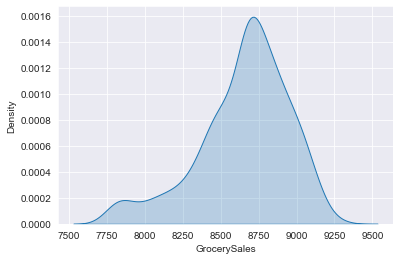

In [125]:
#Grocery Sales density plot 
sns.set_style("darkgrid")
sns.kdeplot(data=train2['GrocerySales'],label="GrocerySales" ,shade=True)

### Model Implementation

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [133]:
X = train['Day']
y = train['GrocerySales']
X_pred = test['Day']

In [137]:
X = np.array(X)
X = X.reshape(-1, 1)

In [140]:
X_pred = np.array(X_pred)
X_pred = X_pred.reshape(-1, 1)

In [141]:
#scaling the data
rs = StandardScaler()

In [142]:
X_scaled = rs.fit_transform(X)
X_pred_scaled = rs.fit_transform(X_pred)

In [143]:
## train test split

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.3,random_state = 42)

### Using Linear Regression (Non-Scaled Data)

In [149]:
### Linear-regression

lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [148]:
predict = lr.predict(test_X)
print('Mean Squared Error: {}'.format(mean_squared_error(test_y,predict)))
print('Mean Absolute Error:{}'.format(mean_absolute_error(test_y,predict)))

Mean Squared Error: 81757.43038722637
Mean Absolute Error:225.32807277576632


In [151]:
y_pred_lr = lr.predict(X_pred)

In [152]:
y_pred_lr

array([8880.35984592, 8881.04150629, 8881.72316667, 8882.40482704,
       8883.08648741, 8883.76814779, 8884.44980816, 8885.13146853,
       8885.8131289 , 8886.49478928, 8887.17644965, 8887.85811002,
       8888.53977039, 8889.22143077, 8889.90309114, 8890.58475151,
       8891.26641188, 8891.94807226, 8892.62973263, 8893.311393  ,
       8893.99305338, 8894.67471375, 8895.35637412, 8896.03803449,
       8896.71969487, 8897.40135524, 8898.08301561, 8898.76467598,
       8899.44633636, 8900.12799673, 8900.8096571 , 8901.49131747,
       8902.17297785, 8902.85463822, 8903.53629859, 8904.21795897,
       8904.89961934, 8905.58127971, 8906.26294008, 8906.94460046,
       8907.62626083, 8908.3079212 , 8908.98958157, 8909.67124195,
       8910.35290232, 8911.03456269, 8911.71622307, 8912.39788344,
       8913.07954381, 8913.76120418, 8914.44286456, 8915.12452493,
       8915.8061853 , 8916.48784567, 8917.16950605, 8917.85116642,
       8918.53282679, 8919.21448716, 8919.89614754, 8920.57780

In [153]:
### KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

KNeighborsRegressor()

In [154]:
predict_knn = knn.predict(test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,predict_knn))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,predict_knn))

Mean Squared Error: 42011.74
Mean Absolute Error: 152.64


In [169]:
y_pred_knn = knn.predict(X_pred)

In [170]:
y_pred_knn

array([8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.

#### Using Linear Regression (Scaled Data)

In [155]:
scaled_train_X, scaled_test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3,random_state = 42)

In [156]:
lr = LinearRegression()
lr.fit(scaled_train_X,train_y)

LinearRegression()

In [157]:
scaled_predict = lr.predict(scaled_test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,scaled_predict))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,scaled_predict))

Mean Squared Error: 81757.43
Mean Absolute Error: 225.33


In [158]:
y_pred_scaled_lr = lr.predict(X_pred_scaled)

In [159]:
y_pred_scaled_lr

array([8410.91648833, 8416.15801728, 8421.39954624, 8426.64107519,
       8431.88260415, 8437.1241331 , 8442.36566206, 8447.60719101,
       8452.84871996, 8458.09024892, 8463.33177787, 8468.57330683,
       8473.81483578, 8479.05636473, 8484.29789369, 8489.53942264,
       8494.7809516 , 8500.02248055, 8505.2640095 , 8510.50553846,
       8515.74706741, 8520.98859637, 8526.23012532, 8531.47165428,
       8536.71318323, 8541.95471218, 8547.19624114, 8552.43777009,
       8557.67929905, 8562.920828  , 8568.16235695, 8573.40388591,
       8578.64541486, 8583.88694382, 8589.12847277, 8594.37000172,
       8599.61153068, 8604.85305963, 8610.09458859, 8615.33611754,
       8620.57764649, 8625.81917545, 8631.0607044 , 8636.30223336,
       8641.54376231, 8646.78529127, 8652.02682022, 8657.26834917,
       8662.50987813, 8667.75140708, 8672.99293604, 8678.23446499,
       8683.47599394, 8688.7175229 , 8693.95905185, 8699.20058081,
       8704.44210976, 8709.68363871, 8714.92516767, 8720.16669

In [160]:
#### Using KNN Regressor (Scaled Data)

knn = KNeighborsRegressor()
knn.fit(scaled_train_X,train_y)

KNeighborsRegressor()

In [161]:
scaled_predict_knn = knn.predict(scaled_test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,scaled_predict_knn))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,scaled_predict_knn))

Mean Squared Error: 41982.70
Mean Absolute Error: 151.40


In [162]:
y_pred_scaled_knn = knn.predict(X_pred_scaled)

In [163]:
y_pred_scaled_knn

array([8518.608    , 8588.418    , 8695.568    , 8558.97     ,
       8307.028    , 8022.352    , 8500.078    , 8542.758    ,
       8508.084    , 8918.778    , 8716.894    , 8653.436    ,
       8110.02     , 8677.77     , 8677.77     , 8478.238    ,
       8051.554    , 8430.042    , 8573.02     , 8612.895433 ,
       8662.4164598, 9003.178    , 8942.726    , 8458.368    ,
       7958.828    , 8421.408    , 8358.214    , 8314.582    ,
       8133.462    , 8459.368    , 8434.2134866, 8492.883433 ,
       8592.127433 , 8583.879433 , 8831.2954866, 8674.8254866,
       8033.078    , 8322.45     , 8513.702    , 8453.27     ,
       8432.54     , 8411.024    , 8566.342    , 8645.814    ,
       8724.856    , 8725.82     , 8786.362    , 8978.532    ,
       8902.206    , 8994.868    , 8889.312    , 8735.0134866,
       8635.056    , 8650.312    , 8677.536    , 8701.11     ,
       8622.306    , 8523.91     , 8772.97     , 8923.36     ,
       8919.814    , 8913.724    , 8972.694    , 8637.2

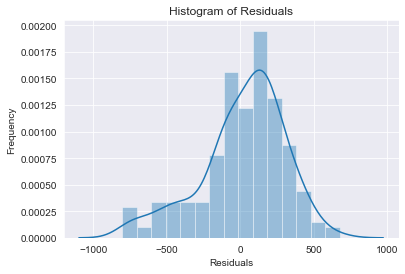

In [164]:
sns.distplot(test_y-predict)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

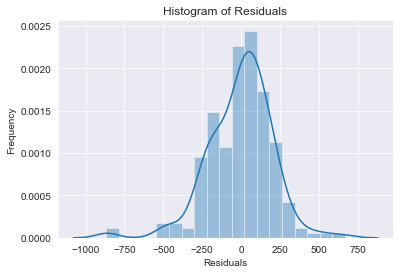

In [165]:
sns.distplot(test_y-predict_knn)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

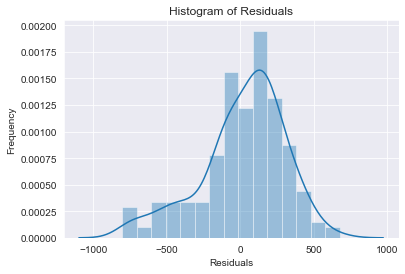

In [166]:
sns.distplot(test_y-scaled_predict)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

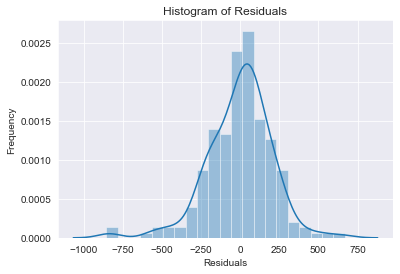

In [167]:
sns.distplot(test_y-scaled_predict_knn)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [187]:
df1 = pd.DataFrame(y_pred_lr,columns=['GrocerySales_lr'])
df2 = pd.DataFrame(y_pred_knn,columns=['GrocerySales_knn'])
df3 = pd.DataFrame(y_pred_scaled_lr,columns=['GrocerySales_lrs'])
df4 = pd.DataFrame(y_pred_scaled_knn,columns=['GrocerySales_knns'])


In [188]:
temp = [test, df1, df2, df3, df4]

In [189]:
test_result = pd.concat(temp, axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

In [215]:
lineplot = test_result.melt('Day', var_name='cols', value_name='vals')

<AxesSubplot:xlabel='Day', ylabel='vals'>

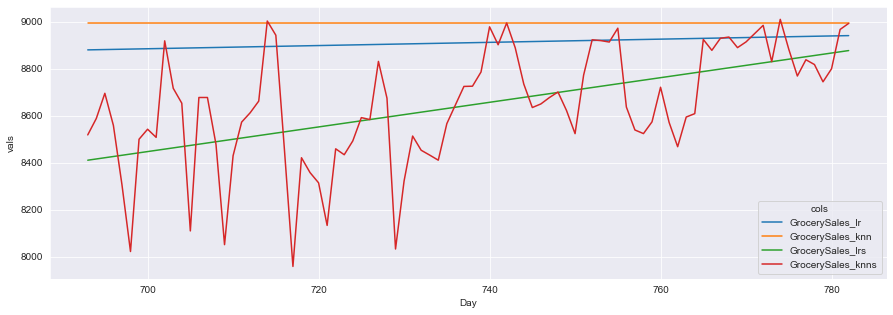

In [223]:


fig = plt.figure(figsize=(15,5))
sns.lineplot(data=lineplot,x=lineplot.Day,y=lineplot.vals,hue = 'cols')

## Selecting KNeighborsRegressor used on scaled data as mean_squared_error and Mean Absolute Error is lowest when compare to other models